# 匯入模組

```
pip install pandas
pip install jieba
pip install GoogleNews
pip install matplotlib
pip install Pillow
pip install numpy
pip install scipy
pip install wordcloud
```

In [1]:
# 匯入模組
import pandas as pd
import jieba
from GoogleNews import GoogleNews
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image
import numpy as np
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator


需要知道的觀念和套件：

1. Pandas 資料處理
2. GoogleNews 爬蟲套件
3. WordCloud 文字雲套件
4. Image.open 讀取圖片
5. numpy 陣列操作
6. jieba 斷詞套件
7. datetime 日期處理


# 初始化 Google News 物件

In [2]:
# Google News初始化設定
googlenews = GoogleNews(lang='zh-tw', region='TW', encode='utf-8')

# 啟用除錯模式 try except
googlenews.enableException(True)

# 使用者輸入關鍵字

In [3]:
# , period='1d'
set_time = input("請輸入要搜尋的時間 (1d, 7d, 30d): ")
googlenews.set_period(set_time)
# 使用者輸入關鍵字
# keyword = input("請輸入要搜尋的關鍵字: ")
keyword = "柯文哲"
googlenews.search(keyword)

In [4]:
# test
result = googlenews.result()
print(f"標題: {result[0]['title']}")

標題: 柯文哲案最新聲量曝光 TPOC評白營用盡招數聲援：輿情看法恐已定型



# 顯示搜尋結果

In [5]:
# 獲取搜尋結果
result = googlenews.result()

# 顯示新聞標題和連結
for item in result:
    print(f"標題: {item['title']}")
    print(f"連結: {item['link']}")
    print('---')

標題: 柯文哲案最新聲量曝光 TPOC評白營用盡招數聲援：輿情看法恐已定型
連結: https://www.ettoday.net/news/20240918/2819212.htm&ved=2ahUKEwiBy6iPkMyIAxXxZvUHHdieCNkQxfQBegQIBRAC&usg=AOvVaw0iTmZHexOdR8y-IyfhX6e1
---
標題: 小草齊聚看守所「陪過中秋」 北檢追金流今再提訊柯文哲
連結: https://www.mirrormedia.mg/story/20240918edi004&ved=2ahUKEwiBy6iPkMyIAxXxZvUHHdieCNkQxfQBegQICRAC&usg=AOvVaw2AfzxwuKrjqtiKKY_D-gVr
---
標題: 民眾黨護航柯文哲！黃智賢轟「史上最無恥政客集團」：黑社會都甘拜下風
連結: https://tw.news.yahoo.com/%25E6%25B0%2591%25E7%259C%25BE%25E9%25BB%25A8%25E8%25AD%25B7%25E8%2588%25AA%25E6%259F%25AF%25E6%2596%2587%25E5%2593%25B2-%25E9%25BB%2583%25E6%2599%25BA%25E8%25B3%25A2%25E8%25BD%259F-%25E5%258F%25B2%25E4%25B8%258A%25E6%259C%2580%25E7%2584%25A1%25E6%2581%25A5%25E6%2594%25BF%25E5%25AE%25A2%25E9%259B%2586%25E5%259C%2598-%25E9%25BB%2591%25E7%25A4%25BE%25E6%259C%2583%25E9%2583%25BD%25E7%2594%2598%25E6%258B%259C%25E4%25B8%258B%25E9%25A2%25A8-081927568.html&ved=2ahUKEwiBy6iPkMyIAxXxZvUHHdieCNkQxfQBegQIBxAC&usg=AOvVaw2Xl3W8OKMtu7a7D1X9jlCp
---
標題: 北檢追柯匿名捐款 蔡正元算出「柯文哲行情價」：反而在表彰他多偉大
連結: h

# 儲存成靜態文字檔案 Json 格式

In [6]:
# <!-- 儲存至 Json -->
import json
from datetime import datetime

# 獲取當前日期
today = datetime.now().strftime('%Y%m%d')

# 生成文件名
filename = f"./json_output/{today}_{keyword}_{set_time}.json"

# 將 result 寫入 JSON 文件
with open(filename, 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

print(f"搜尋結果已儲存為: {filename}")


搜尋結果已儲存為: ./json_output/20240918_柯文哲_7d.json


In [7]:
# <!-- 讀取 Json檔案 -->

# 讀取 JSON 文件
with open(filename, 'r', encoding='utf-8') as f:
    loaded_result = json.load(f)

print(loaded_result)
print(type(loaded_result))


[{'title': '柯文哲案最新聲量曝光 TPOC評白營用盡招數聲援：輿情看法恐已定型', 'media': 'ETtoday新聞雲', 'date': '6 分鐘前', 'datetime': nan, 'desc': '民眾黨主席柯文哲因京華城案遭羈押已14天。對此，台灣議題研究中心（TPOC）18日分析「柯文哲網路聲量及好感度」，儘管民眾黨大力聲援，但相關議題網路聲量持續走低，...', 'link': 'https://www.ettoday.net/news/20240918/2819212.htm&ved=2ahUKEwiBy6iPkMyIAxXxZvUHHdieCNkQxfQBegQIBRAC&usg=AOvVaw0iTmZHexOdR8y-IyfhX6e1', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}, {'title': '小草齊聚看守所「陪過中秋」 北檢追金流今再提訊柯文哲', 'media': '鏡週刊Mirror Media', 'date': '5 分鐘前', 'datetime': nan, 'desc': '台灣民眾黨主席柯文哲在台北市長任內通過的京華城容積案爭議持續延燒，柯文哲本月5日遭台北地院裁定羈押禁見，昨（17日）在台北看守所度過中秋節。檢察官持續追查京華城案...', 'link': 'https://www.mirrormedia.mg/story/20240918edi004&ved=2ahUKEwiBy6iPkMyIAxXxZvUHHdieCNkQxfQBegQICRAC&usg=AOvVaw2AfzxwuKrjqtiKKY_D-gVr', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}, {'title': '民眾黨護航柯文哲！黃智賢轟「史上最無恥政客集團」：黑社會都甘拜下風', 'media': 'Yahoo新聞', 'date': '9 分鐘前', 'datetime': nan, 'desc': '民眾黨主席柯文哲在台北市長任內涉及

# 停用詞過濾

In [8]:
import re

# 讀取停用詞
with open(r'./stopword.txt', 'r', encoding='utf-8') as file:
    stopword = file.read().splitlines() # BIF splitlines
    # print(stopword)

# 加入 \n 換行方便閱讀
all_titles = "\n".join([item['title'] for item in result])
print("原始標題:")
print(all_titles)
# print(type(all_titles))
# print("--"*60)
# seg_list = jieba.cut(all_titles)
# print(type(seg_list))
print("斷詞結果:")
seg_list = jieba.lcut(all_titles)
print(seg_list)
print("--"*60)

# 預編譯正則表達式
english_pattern = re.compile(r'^[a-zA-Z]+$')

def is_english(text):
    return bool(english_pattern.match(text))

# 過濾停用詞和空白字符
filtered_words = []
for word in seg_list:
    # 去除詞的前後空白 跟上面產生的 \n
    cleaned_word = word.strip()
    # 檢查詞是否為空且不在停用詞列表中
    if cleaned_word and cleaned_word not in stopword and not is_english(cleaned_word):
        filtered_words.append(cleaned_word)
print('加入停用詞: ')
print("".join(filtered_words))
print("--"*60)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bq/x7m_syf57yz69kw1ysgwhbv40000gp/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/bq/x7m_syf57yz69kw1ysgwhbv40000gp/T/jieba.cache


原始標題:
柯文哲案最新聲量曝光 TPOC評白營用盡招數聲援：輿情看法恐已定型
小草齊聚看守所「陪過中秋」 北檢追金流今再提訊柯文哲
民眾黨護航柯文哲！黃智賢轟「史上最無恥政客集團」：黑社會都甘拜下風
北檢追柯匿名捐款 蔡正元算出「柯文哲行情價」：反而在表彰他多偉大
不信法院信鬼神？陳柏惟揭民眾黨開壇救柯文哲怪招：放生還阿北自由| 政治
聲援柯文哲！民眾黨狂辦全國宣講 最新數據曝：網路聲量持續下跌
週刊爆柯文哲金流民眾黨嗆：寫故事也要有邏輯| 政治
柯文哲 1500 是收以太幣？鬼才阿水上政論節目：價值1.1億元較合理
見北檢辦柯文哲案舉動 黃暐瀚點名這4人：為是否涉犯圖利關鍵
今天是專攻柯文哲Day「訊問進入第4小時」！9萬多筆「匿名捐獻金」能說明白？ @newsebc
斷詞結果:


Loading model cost 0.383 seconds.
DEBUG:jieba:Loading model cost 0.383 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


['柯文', '哲案', '最新', '聲量', '曝光', ' ', 'TPOC', '評白營', '用', '盡', '招數', '聲援', '：', '輿情', '看法', '恐已', '定型', '\n', '小草', '齊聚', '看守所', '「', '陪過', '中秋', '」', ' ', '北檢', '追金流', '今', '再', '提訊', '柯文', '哲', '\n', '民眾', '黨護航', '柯文', '哲', '！', '黃', '智賢', '轟', '「', '史上', '最無恥', '政客', '集團', '」', '：', '黑社會', '都', '甘拜', '下風', '\n', '北檢', '追柯', '匿名', '捐款', ' ', '蔡正元算出', '「', '柯文', '哲', '行情', '價', '」', '：', '反而', '在', '表彰', '他', '多偉大', '\n', '不', '信', '法院', '信', '鬼神', '？', '陳', '柏惟', '揭民眾', '黨', '開壇', '救', '柯文', '哲', '怪招', '：', '放生', '還阿北', '自由', '|', ' ', '政治', '\n', '聲援', '柯文', '哲', '！', '民眾', '黨', '狂辦', '全國', '宣講', ' ', '最新', '數據', '曝', '：', '網路', '聲量', '持續', '下跌', '\n', '週刊', '爆', '柯文', '哲金', '流民', '眾黨', '嗆', '：', '寫', '故事', '也', '要', '有', '邏輯', '|', ' ', '政治', '\n', '柯文', '哲', ' ', '1500', ' ', '是', '收', '以太', '幣', '？', '鬼才', '阿', '水上', '政論', '節目', '：', '價值', '1.1', '億元', '較', '合理', '\n', '見北', '檢辦', '柯文', '哲案', '舉動', ' ', '黃', '暐', '瀚', '點名', '這', '4', '人', '：', '為', '是否', '涉犯', '圖利', '關鍵', '\n', '今天


   - `^` 表示字符串的開始
   - `[a-zA-Z]` 表示任何英文字母（大寫或小寫）
   - `+` 表示前面的字符至少出現一次
   - `$` 表示字符串的結束
   -  `.*`：匹配任意字符（除換行符外）零次或多次

# 計算文字出現次數

In [9]:
# 使用 BIF Counter 計算詞頻
word_count = Counter(filtered_words)
print(word_count)
print(type(word_count))
print(dir(word_count))

print("--"*60)

print("word_count.items():")
print(word_count.items())
print(type(word_count.items()))

print("--"*60)

# 將 word_count 轉換為 dict
word_count_dict = dict(word_count)

# 欸？ counter 轉 dict 後，key 的順序改變了
from collections import OrderedDict
word_count_dict = OrderedDict(word_count.most_common())

print("word_count_dict:")
print(word_count_dict)
print(type(word_count_dict))

print("--"*60)

 

Counter({'柯文': 10, '哲': 7, '哲案': 2, '最新': 2, '聲量': 2, '聲援': 2, '北檢': 2, '民眾': 2, '黃': 2, '匿名': 2, '信': 2, '黨': 2, '政治': 2, '曝光': 1, '評白營': 1, '用': 1, '盡': 1, '招數': 1, '輿情': 1, '看法': 1, '恐已': 1, '定型': 1, '小草': 1, '齊聚': 1, '看守所': 1, '陪過': 1, '中秋': 1, '追金流': 1, '今': 1, '再': 1, '提訊': 1, '黨護航': 1, '智賢': 1, '轟': 1, '史上': 1, '最無恥': 1, '政客': 1, '集團': 1, '黑社會': 1, '都': 1, '甘拜': 1, '下風': 1, '追柯': 1, '捐款': 1, '蔡正元算出': 1, '行情': 1, '價': 1, '反而': 1, '表彰': 1, '多偉大': 1, '不': 1, '法院': 1, '鬼神': 1, '陳': 1, '柏惟': 1, '揭民眾': 1, '開壇': 1, '救': 1, '怪招': 1, '放生': 1, '還阿北': 1, '自由': 1, '狂辦': 1, '全國': 1, '宣講': 1, '數據': 1, '曝': 1, '網路': 1, '持續': 1, '下跌': 1, '週刊': 1, '爆': 1, '哲金': 1, '流民': 1, '眾黨': 1, '嗆': 1, '寫': 1, '故事': 1, '要': 1, '邏輯': 1, '1500': 1, '收': 1, '以太': 1, '幣': 1, '鬼才': 1, '阿': 1, '水上': 1, '政論': 1, '節目': 1, '價值': 1, '1.1': 1, '億元': 1, '較': 1, '合理': 1, '見北': 1, '檢辦': 1, '舉動': 1, '暐': 1, '瀚': 1, '點名': 1, '人': 1, '為': 1, '是否': 1, '涉犯': 1, '圖利': 1, '關鍵': 1, '今天': 1, '專攻': 1, '訊': 1, '問進入': 1, '第': 1, '小時'

# 從字典取出資料

字典可以使用的方法
['clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 

'pop', 'popitem', 'setdefault', 'update', 'values']


In [10]:
# print(dir(word_count_dict))
# print(word_count_dict.items())
# print(type(word_count_dict.items()))
# print(word_count_dict.keys())
# words = list(word_count_dict.keys())
# counts = list(word_count_dict.values())

# items ===> 同時取出 key 和 value 就可以直接加入 dataframe

words = []
counts = []

print("--"*60)

for key in word_count_dict:
    print(key, word_count_dict[key])
    words.append(key)
    counts.append(word_count_dict[key])

# words = [key for key in word_count_dict]
# counts = [word_count_dict[key] for key in word_count_dict]

print(words)
print(counts)

print("--"*60)

------------------------------------------------------------------------------------------------------------------------
柯文 10
哲 7
哲案 2
最新 2
聲量 2
聲援 2
北檢 2
民眾 2
黃 2
匿名 2
信 2
黨 2
政治 2
曝光 1
評白營 1
用 1
盡 1
招數 1
輿情 1
看法 1
恐已 1
定型 1
小草 1
齊聚 1
看守所 1
陪過 1
中秋 1
追金流 1
今 1
再 1
提訊 1
黨護航 1
智賢 1
轟 1
史上 1
最無恥 1
政客 1
集團 1
黑社會 1
都 1
甘拜 1
下風 1
追柯 1
捐款 1
蔡正元算出 1
行情 1
價 1
反而 1
表彰 1
多偉大 1
不 1
法院 1
鬼神 1
陳 1
柏惟 1
揭民眾 1
開壇 1
救 1
怪招 1
放生 1
還阿北 1
自由 1
狂辦 1
全國 1
宣講 1
數據 1
曝 1
網路 1
持續 1
下跌 1
週刊 1
爆 1
哲金 1
流民 1
眾黨 1
嗆 1
寫 1
故事 1
要 1
邏輯 1
1500 1
收 1
以太 1
幣 1
鬼才 1
阿 1
水上 1
政論 1
節目 1
價值 1
1.1 1
億元 1
較 1
合理 1
見北 1
檢辦 1
舉動 1
暐 1
瀚 1
點名 1
人 1
為 1
是否 1
涉犯 1
圖利 1
關鍵 1
今天 1
專攻 1
訊 1
問進入 1
第 1
小時 1
萬多筆 1
捐獻金 1
能 1
說 1
明白 1
@ 1
['柯文', '哲', '哲案', '最新', '聲量', '聲援', '北檢', '民眾', '黃', '匿名', '信', '黨', '政治', '曝光', '評白營', '用', '盡', '招數', '輿情', '看法', '恐已', '定型', '小草', '齊聚', '看守所', '陪過', '中秋', '追金流', '今', '再', '提訊', '黨護航', '智賢', '轟', '史上', '最無恥', '政客', '集團', '黑社會', '都', '甘拜', '下風', '追柯', '捐款', '蔡正元算出', '行情', '價', '反而', '表彰', '多偉大', '不

# 使用 Pandas 排序呈現資料

練習用 Series 方式加入


In [11]:
# 創建一個 pandas Series，使用單字作為索引，詞頻作為值
word_count_series = pd.Series(data=counts, index=words, name='一維陣列詞頻Series')
print(word_count_series.info())
print(word_count_series.head)
print("--"*60)

<class 'pandas.core.series.Series'>
Index: 118 entries, 柯文 to @
Series name: 一維陣列詞頻Series
Non-Null Count  Dtype
--------------  -----
118 non-null    int64
dtypes: int64(1)
memory usage: 1.8+ KB
None
<bound method NDFrame.head of 柯文     10
哲       7
哲案      2
最新      2
聲量      2
       ..
捐獻金     1
能       1
說       1
明白      1
@       1
Name: 一維陣列詞頻Series, Length: 118, dtype: int64>
------------------------------------------------------------------------------------------------------------------------


In [12]:
word_text_series = pd.Series(data=words, name='一維陣列文字Series')
print(word_text_series.info())

print("--"*60)
print(word_text_series.head)

<class 'pandas.core.series.Series'>
RangeIndex: 118 entries, 0 to 117
Series name: 一維陣列文字Series
Non-Null Count  Dtype 
--------------  ----- 
118 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB
None
------------------------------------------------------------------------------------------------------------------------
<bound method NDFrame.head of 0       柯文
1        哲
2       哲案
3       最新
4       聲量
      ... 
113    捐獻金
114      能
115      說
116     明白
117      @
Name: 一維陣列文字Series, Length: 118, dtype: object>


In [13]:
# 將單一 Series 轉換為 DataFrame
df = word_count_series.reset_index()
df.columns = ['word', 'count']  # 重命名列
print(df.info())
print(df.head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    118 non-null    object
 1   count   118 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB
None
<bound method NDFrame.head of     word  count
0     柯文     10
1      哲      7
2     哲案      2
3     最新      2
4     聲量      2
..   ...    ...
113  捐獻金      1
114    能      1
115    說      1
116   明白      1
117    @      1

[118 rows x 2 columns]>


In [14]:
# 將多個 Series 轉換為 DataFrame

# 重置兩個 Series 的索引
word_text_series = word_text_series.reset_index(drop=True)
word_count_series = word_count_series.reset_index(drop=True)

# 使用 concat 創建 DataFrame
df = pd.concat([word_text_series, word_count_series], axis=1)

# 重命名列
df.columns = ['word', 'count']

# 移除任何包含 NaN 的行
df = df.dropna()

# 顯示 DataFrame 的資訊
print(df.info())

# 顯示 DataFrame 的前幾行
print("\nDataFrame 預覽：")
print(df.head())

# # 如果需要，可以按計數降序排序
# df_sorted = df.sort_values('count', ascending=False).reset_index(drop=True)

# # 顯示排序後的 DataFrame 前幾行
# print("\n排序後：")
# print(df_sorted.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    118 non-null    object
 1   count   118 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB
None

DataFrame 預覽：
  word  count
0   柯文     10
1    哲      7
2   哲案      2
3   最新      2
4   聲量      2


In [15]:
# 將字典轉換為 DataFrame
df2 = pd.DataFrame(list(word_count_dict.items()), columns=['word', 'count'])


# df_sorted_org = df.sort_values(by='count', ascending=False)
df_sorted = df2.sort_values(by='count', ascending=False).reset_index(drop=True)

print("df2:")
print(df2)
print("--"*60)
print("\ndf_sorted 資料結構:")
print(df_sorted.info())
print("\ndf_sorted:")
print(df_sorted.head)
print("\ndf_sorted 索引:")
print(df_sorted.index)


df2:
    word  count
0     柯文     10
1      哲      7
2     哲案      2
3     最新      2
4     聲量      2
..   ...    ...
113  捐獻金      1
114    能      1
115    說      1
116   明白      1
117    @      1

[118 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------

df_sorted 資料結構:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    118 non-null    object
 1   count   118 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB
None

df_sorted:
<bound method NDFrame.head of     word  count
0     柯文     10
1      哲      7
2     民眾      2
3      黨      2
4      信      2
..   ...    ...
113   捐款      1
114   追柯      1
115   下風      1
116   甘拜      1
117    @      1

[118 rows x 2 columns]>

df_sorted 索引:
RangeIndex(start=0, stop=118, step=1)


# 製作文字雲圖片遮罩

/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf
Type of mask_color: <class 'numpy.ndarray'>
Shape of mask_color: (540, 960)
Data type of mask_color: uint8


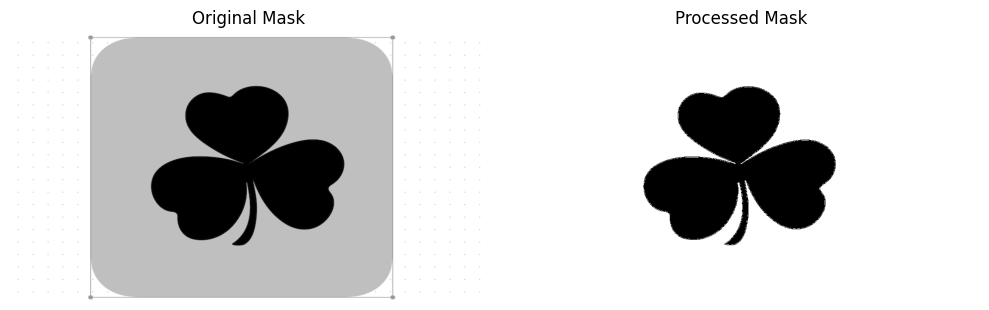

原始x色像素數量：198232，總像素數：518400（佔比：38.24%）
處理後x色像素數量：445317，總像素數：518400（佔比：85.90%）


In [16]:
# 選擇黑色遮罩圖案練習處理圖片
# 正常圖片張照把那些註解區域替換即可

# from PIL import ImageOps # 反轉黑白
# ImageOps.invert()

# 詢問使用者字體檔案路徑
# font_path_input = input("請輸入中文字體的檔案路徑: ")
font_path_input = "/Users/larry/Github/Python-WordCloud/TaipeiSansTCBeta-Bold.ttf"
print(font_path_input)
# 文字雲圖片遮罩檔案路徑
img_path = "./Mask_Image/LeafDrak_mask.png"

# 讀取遮罩圖片，轉換為 RGB，調整大小，然後轉換為 numpy 陣列
# mask_color = np.array(Image.open(img_path).convert("RGB").resize((960, 540)))

# 轉灰階
mask_color = np.array((Image.open(img_path).convert("L")).resize((960, 540)))
# 查看 mask_color 的類型和屬性
print("Type of mask_color:", type(mask_color))
print("Shape of mask_color:", mask_color.shape)
print("Data type of mask_color:", mask_color.dtype)
# print("Attributes and methods of array:", dir(mask_color))
total_pixels = mask_color.size
# org_filtered_pixels = np.sum(np.all(mask_image == 255, axis=2))
org_pixels = np.sum(mask_color == 255)

# 高精度尺寸圖適用
# # 每隔 n 個像素取一個像素
# mask_color = mask_color[::2, ::2]

# 二維陣列，因為模式 L
# 簡單的縮小（每隔一個像素取樣）
mask_color_small = mask_color[::4, ::4]
# 簡單的放大（重複像素）
mask_color_large = np.repeat(np.repeat(mask_color_small, 2, axis=0), 2, axis=1)

# 進行二次處理，保留灰階
mask_image = mask_color.copy()
# 不使用模組，numpy 反轉處理方式
# mask_image = 255 - mask_color
# 去噪應用
threshold = 15# 根據圖片調整閾值
# mask_image[np.all(mask_image < threshold, axis=2)] = 255
mask_image[mask_image > threshold] = 255
# 只要是（偏）()色區域，都設為()色


# 邊緣檢測 (進階用法，此部分為當初課堂老師提供)
# 我的理解：將三個顏色通道做了某個處理，然後將三個通道的結果累加，最後除以 3 得到平均值
# edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i] / 255., 2) for i in range(3)], axis=0)

# (請 AI 不用串列生成式語法糖的方式替換後的版本)
# # 邊緣檢測
# edges = np.zeros_like(mask_color[:,:,0], dtype=np.float64)  # 創建一個與遮罩圖片同大小的零矩陣

# for i in range(3):  # 遍歷RGB三個通道
#     # 對每個通道應用高斯梯度幅值
#     # 255.0 用於將像素值歸一化到 0-1 範圍
#     # 2 是高斯核的標準差，控制邊緣檢測的敏感度
#     gradient = gaussian_gradient_magnitude(mask_color[:,:,i] / 255.0, sigma=2)
#     edges += gradient  # 累加每個通道的梯度

# edges /= 3  # 取三個通道的平均值

# 將高於閾值的邊緣像素設為白色
# mask_image[edges > 0.95] = 255


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# 顯示原始遮罩圖片
ax1.imshow(mask_color, cmap='gray')
ax1.set_title("Original Mask")
ax1.axis('off')

# 顯示處理後的遮罩圖片
ax2.imshow(mask_image, cmap='gray')
ax2.set_title("Processed Mask")
ax2.axis('off')

plt.tight_layout()
plt.show()



# filtered_pixels = np.sum(np.all(mask_image == 255, axis=2))
filtered_pixels = np.sum(mask_image == 255)
# total_pixels = mask_image.shape[0] * mask_image.shape[1]


print(f"原始x色像素數量：{org_pixels}，總像素數：{total_pixels}（佔比：{org_pixels/total_pixels*100:.2f}%）")
print(f"處理後x色像素數量：{filtered_pixels}，總像素數：{total_pixels}（佔比：{filtered_pixels/total_pixels*100:.2f}%）")

# 將高於閾值的邊緣像素設為白色

# 顏色生成
# image_colors = ImageColorGenerator(mask_image)
# image_colors.default_color = [0.9,0.9,0.9]


"""

AI 回覆的內容，關於邊緣檢測：

這個版本的代碼做了以下事情：

1. 創建一個與單個顏色通道相同大小的零矩陣。
2. 遍歷三個顏色通道（RGB）。
3. 對每個通道計算高斯梯度幅值。
4. 將每個通道的梯度累加到 `edges` 矩陣中。
5. 最後，將累加的結果除以 3 來獲得平均值。

這個方法實現了與原始代碼相同的功能，但避免了使用列表推導式和 `np.mean` 的 `axis` 參數，可能更容易理解每一步在做什麼。最後，仍然將高於閾值的邊緣像素設為白色，以在遮罩中突出顯示邊緣。


- 高斯梯度幅值越低 → 越可能是平滑區域（非邊緣）

- 高斯梯度幅值越高 → 越可能是邊緣

我：邊緣設為白色不就是不明顯了嗎？

您提出了一個很好的觀察。讓我解釋一下這個看似矛盾的做法的原因：

1. 在生成詞雲的上下文中，白色（255）通常代表可以放置文字的區域。

2. 將邊緣設為白色的目的不是為了在最終的詞雲中使邊緣更明顯，而是為了指導詞雲生成算法在哪裡可以放置文字。

3. 通過將邊緣設為白色，我們實際上是告訴詞雲生成器："這些是圖像的重要特徵，你可以在這些地方放置文字"。

4. 這樣做的結果是，文字會傾向於沿著原始圖像的輪廓和主要特徵分布，而不是隨機分布或覆蓋重要的視覺元素。

5. 在最終的詞雲中，這些邊緣不會直接可見，但它們會影響文字的排列方式，使得詞雲的整體形狀能夠反映原始圖像的輪廓。

所以，雖然在遮罩圖像中邊緣被設為白色看起來不明顯，但這實際上是為了在生成詞雲時保留原始圖像的結構和形狀。最終的效果是，生成的詞雲會呈現出原始圖像的大致輪廓，而不是完全忽視圖像的特徵。

如果您想要在最終的詞雲中使邊緣更加明顯，可以考慮相反的方法：將邊緣設為黑色或其他深色，這樣詞雲生成器就會避免在這些區域放置文字，從而在視覺上保留原始圖像的輪廓。

"""

AI 回覆，關於 Pillow 的 Mode 參數


1. "L" (Luminance) 模式：
   - 每個像素用 0 到 255 的整數值表示，其中 0 是黑色，255 是白色。
2. "RGB" (Red, Green, Blue) 模式：
3. "RGBA" (Red, Green, Blue, Alpha) 模式：
4. "1" (1-bit pixels, black and white) 模式：
   - 每個像素只能是 0（黑）或 1（白）。

<!-- 使用 Python Teseeract OCR OpenCV 模組處理圖片，有用過 -->

In [17]:
# 因為轉灰階變成二維，再轉回去三維
if len(mask_image.shape) == 2:
    mask_image = np.stack((mask_image,) * 3, axis=-1)
    print(mask_image.shape)
    print(mask_image)

(540, 960, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


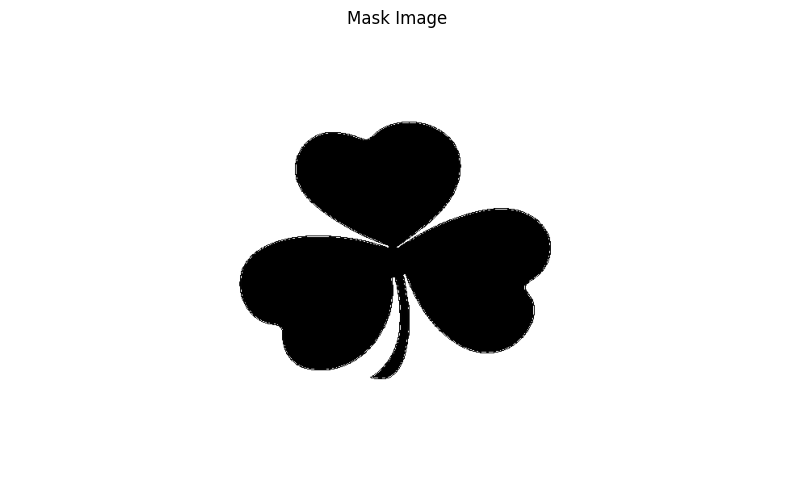

Mask shape: (540, 960, 3)
Mask dtype: uint8
Mask min value: 0
Mask max value: 255


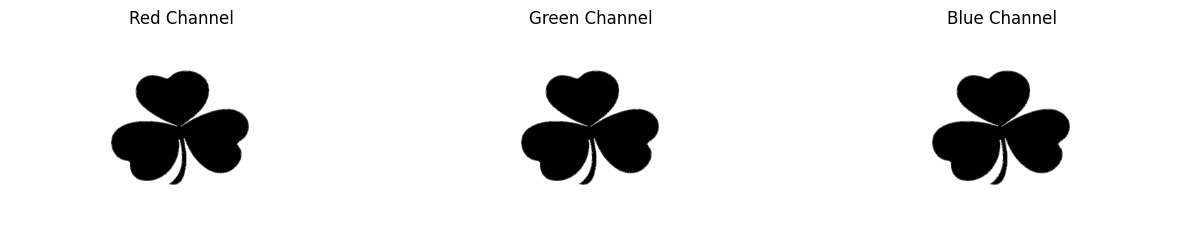

In [18]:
import matplotlib.pyplot as plt

# 檢查轉換後的遮罩圖片
plt.figure(figsize=(10, 6))
plt.imshow(mask_image, cmap='gray')  # 使用灰度顏色映射
plt.title("Mask Image")
plt.axis('off')
plt.show()

# 打印遮罩圖片的形狀和一些基本統計信息
print("Mask shape:", mask_image.shape)
print("Mask dtype:", mask_image.dtype)
print("Mask min value:", mask_image.min())
print("Mask max value:", mask_image.max())

# 如果需要查看 RGB 通道
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(mask_image[:,:,0], cmap='gray')
ax1.set_title('Red Channel')
ax1.axis('off')
ax2.imshow(mask_image[:,:,1], cmap='gray')
ax2.set_title('Green Channel')
ax2.axis('off')
ax3.imshow(mask_image[:,:,2], cmap='gray')
ax3.set_title('Blue Channel')
ax3.axis('off')
plt.show()

# 生成文字雲

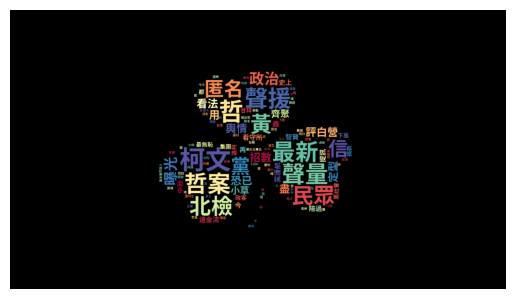

文字雲圖片已儲存為: ./img/20240918_柯文哲_relative_scaling10%.png


In [24]:
# 生成文字雲

# wordcloud = WordCloud(font_path=font_path_input, width=320, height=320,max_font_size=50,max_words=4000,color_func=image_colors).generate_from_frequencies(word_count)
wordcloud = WordCloud(
    font_path=font_path_input,
    width=960,  # 增加寬度以提高畫質
    height=540,  # 增加高度以提高畫質
    mask=mask_image,
    max_font_size=50,  # 增加最大字體大小
    max_words=400,
    # color_func=image_colors,
    prefer_horizontal=0.99,  # 90% 的詞水平放置
    scale=2,  # 增加縮放比例以提高畫質
    min_font_size=2,  # 設置最小字體大小
    background_color="black",  # 設置背景顏色
    mode="RGB",
    relative_scaling=0.1,  # 平衡詞頻和詞排名的重要性
    collocations=True,  # 包含常見詞組
    colormap="Spectral",  # 使用 viridis 色彩映射
    contour_width=1,  # 添加輪廓以增強視覺效果
    contour_color="black"# 設置輪廓顏色
).generate_from_frequencies(word_count_dict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# 儲存文字雲圖片 檔案名稱格式化
today = datetime.now().strftime('%Y%m%d')
image_filename = f"./img/{today}_{keyword}_relative_scaling10%.png"
wordcloud.to_file(image_filename)
print(f"文字雲圖片已儲存為: {image_filename}")

## WordCloud 參數釐清

AI 回覆的內容，關於參數說明：

您提出了一個很好的問題，這確實需要進一步澄清。您是對的，排名通常是基於詞頻的，但它們在詞雲生成中的作用略有不同。讓我解釋得更清楚：

1. 排名 vs 詞頻：
   - 排名：詞的相對位置（第1常見、第2常見等）
   - 詞頻：詞出現的實際次數

2. 差異的重要性：
   - 排名只反映相對順序，不顯示頻率差距
   - 詞頻反映實際出現次數，顯示詞與詞之間的差距

3. 舉例說明：
   假設有三個詞：
   - A：出現100次（排名1）
   - B：出現99次（排名2）
   - C：出現10次（排名3）

   - 純基於排名（0.0）：A、B、C的大小差異很小
   - 純基於詞頻（1.0）：A和B幾乎一樣大，C明顯小得多

4. `relative_scaling` 的作用：
   - 0.0：主要考慮排名，A、B、C大小差異不大
   - 1.0：完全按詞頻，A、B很大且相近，C很小
   - 0.5：平衡兩者，反映排名，也部分反映頻率差異

所以，雖然排名確實基於詞頻，但 `relative_scaling` 參數允許您決定是更注重詞的相對順序（排名），還是更注重詞之間的實際頻率差異。這提供了在視覺呈現上的靈活性。

# 其他資訊確認

In [20]:
import os

print("Current working directory:", os.getcwd())
print("Font file exists:", os.path.exists(font_path_input))

Current working directory: /Users/larry/Github/Python-WordCloud
Font file exists: True
